In [4]:
import datetime
from resnet18 import *
from new_utils import *
setup_seed(6666)


train_loader = load_data()
val_loader = load_data(train=False, n_items=512)
epoch_val_loader = load_data(train=False)

net = ResNet18().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

# max_val_accuracy = 0
# PATH = f'./my-resnet-.pth'
start_time = datetime.datetime.now()
for epoch in range(33):
    acc = train_model(epoch, (train_loader, val_loader, epoch_val_loader), (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
# torch.save(model.state_dict(), PATH)
print('Training time:%d' % (end_time - start_time).seconds)

# draw_loss(loss_list)
# draw_acc(train_err, val_err)

# ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
# print(*ILV, sep='\t')
# print(*EFR, sep='\t')


0	0	loss: 2.337430953979492	lr: 0.10000
train acc: 0.11719	 validation acc: 0.09180
0	50	loss: 2.0978524684906006	lr: 0.10000
train acc: 0.21094	 validation acc: 0.17773
0	100	loss: 1.8861628770828247	lr: 0.10000
train acc: 0.27344	 validation acc: 0.25000
0	150	loss: 1.7858448028564453	lr: 0.10000
train acc: 0.30469	 validation acc: 0.31641
0	200	loss: 1.871690273284912	lr: 0.10000
train acc: 0.25000	 validation acc: 0.37109
0	250	loss: 1.799543023109436	lr: 0.10000
train acc: 0.33594	 validation acc: 0.41992
0	300	loss: 1.6451060771942139	lr: 0.10000
train acc: 0.32031	 validation acc: 0.40820
0	350	loss: 1.6080725193023682	lr: 0.10000
train acc: 0.45312	 validation acc: 0.40820
epoch:   0	epoch acc: 0.4628
1	0	loss: 1.4727892875671387	lr: 0.10000
train acc: 0.46094	 validation acc: 0.47461
1	50	loss: 1.518534779548645	lr: 0.10000
train acc: 0.43750	 validation acc: 0.43359
1	100	loss: 1.3426381349563599	lr: 0.10000
train acc: 0.54688	 validation acc: 0.47461
1	150	loss: 1.4324617385

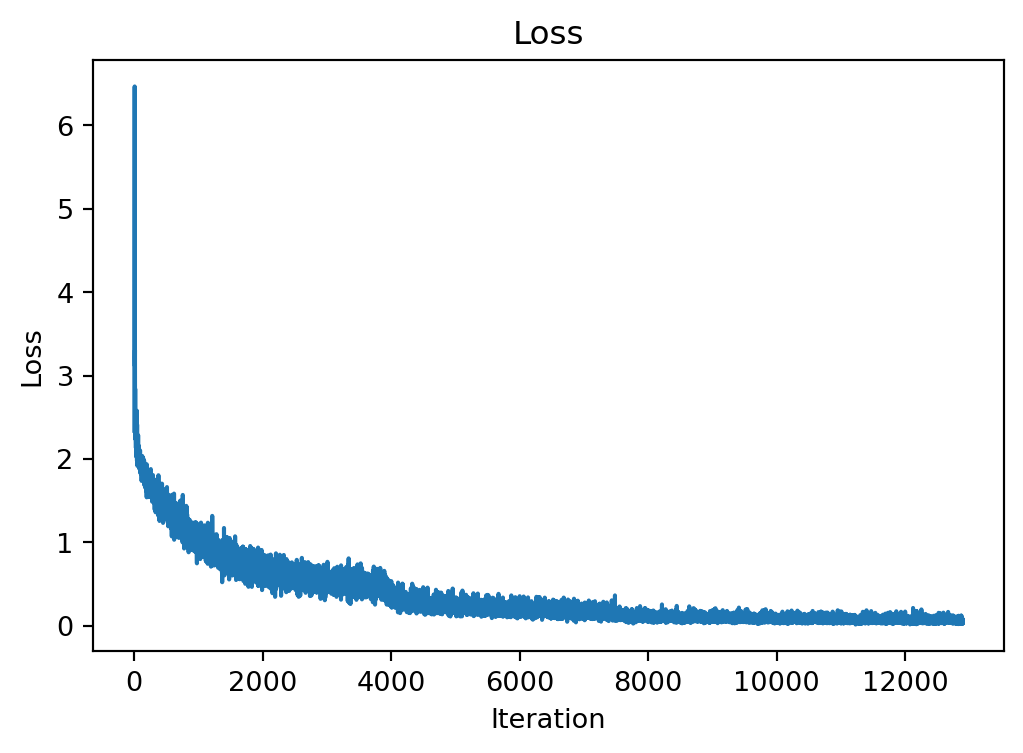

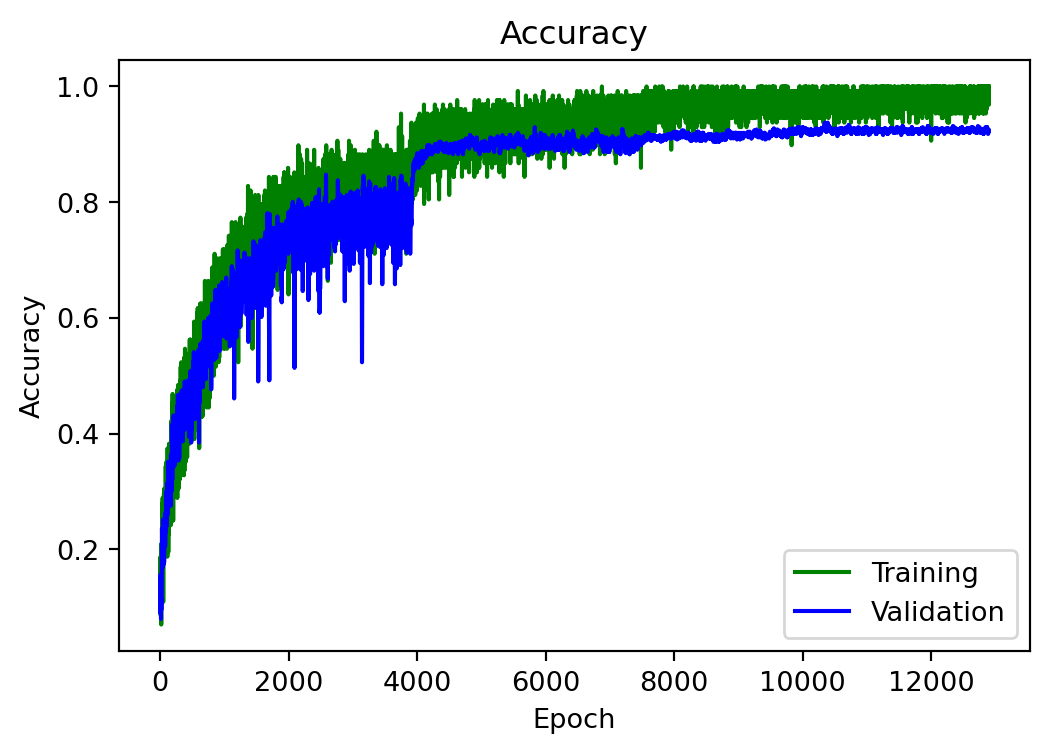

{'loss': 0.03515468764694236, 'train': 0.0025770327764514564, 'val': 0.00196055530472255}
{'loss': 0.035494648464787046, 'train': 0.019095185174678845, 'val': 0.005520975080877436}


In [5]:
draw_loss(loss_list)
draw_acc(train_err, val_err)

loss_list = [i.item() for i in loss_list]
ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
print(ILV)
print(EFR)

In [6]:
torch.save(loss_list, './try-1/loss_list')
torch.save(train_err, './try-1/train_err')
torch.save(val_err, './try-1/val_err')
torch.save(net.state_dict(), './try-1/param.pth')